In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
from scipy.stats import sem
import numpy as np

# Data Import and Setup

In [2]:
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_data = pd.read_csv(mouse_metadata)
study_data = pd.read_csv(study_results)

In [3]:
mouse_data.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
data = pd.merge(mouse_data, study_data, on="Mouse ID")
data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [7]:
data.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

# Summary Statistics

In [8]:
med_group = data.groupby(["Drug Regimen"])
med_group.count()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [9]:
drugs = data["Drug Regimen"].unique()
drugs

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [10]:
sum_table = pd.Series(drugs).to_frame("Drug Regimen")
sum_table

,Drug Regimen
0,Ramicane
1,Capomulin
2,Infubinol
3,Placebo
4,Ceftamin
5,Stelasyn
6,Zoniferol
7,Ketapril
8,Propriva
9,Naftisol


In [11]:
tumor_mean = data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].mean()

In [12]:
tumor_median = data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].median()

In [13]:
tumor_var = data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].var()

In [14]:
tumor_sd = data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].std()

In [15]:
tumor_sem = data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].sem()

In [16]:
sum_table["Mean Tumor Vol"] = tumor_mean.values
sum_table["Median Tumor Vol"] = tumor_median.values
sum_table["Variance of Tumor Vol"] = tumor_var.values
sum_table["Stad Dev of Tumor Vol"] = tumor_sd.values
sum_table["SEM of Tumor Vol"] = tumor_sem.values
sum_table

,Drug Regimen,Mean Tumor Vol,Median Tumor Vol,Variance of Tumor Vol,Stad Dev of Tumor Vol,SEM of Tumor Vol
0,Ramicane,40.675741,41.557809,24.947764,4.994774,0.329346
1,Capomulin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Placebo,55.235638,53.698743,68.553577,8.279709,0.603860
4,Ceftamin,54.331565,52.509285,66.173479,8.134708,0.596466
5,Stelasyn,54.033581,52.288934,61.168083,7.821003,0.581331
6,Zoniferol,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ketapril,40.216745,40.673236,23.486704,4.846308,0.320955
8,Propriva,54.233149,52.431737,59.450562,7.710419,0.573111
9,Naftisol,53.236507,51.818479,48.533355,6.966589,0.516398


In [17]:
sum_table.set_index("Drug Regimen")

,Mean Tumor Vol,Median Tumor Vol,Variance of Tumor Vol,Stad Dev of Tumor Vol,SEM of Tumor Vol
Drug Regimen,,,,,
Ramicane,40.675741,41.557809,24.947764,4.994774,0.329346
Capomulin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Placebo,55.235638,53.698743,68.553577,8.279709,0.603860
Ceftamin,54.331565,52.509285,66.173479,8.134708,0.596466
Stelasyn,54.033581,52.288934,61.168083,7.821003,0.581331
Zoniferol,52.322552,50.854632,42.351070,6.507770,0.512884
Ketapril,40.216745,40.673236,23.486704,4.846308,0.320955
Propriva,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots of Data Points

### Pandas DataFrame Plot

In [18]:
%matplotlib notebook

In [19]:
drug_grp = data.groupby("Drug Regimen")
drug_grp

In [20]:
count_obs = drug_grp["Drug Regimen"].count()
count_obs

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

<IPython.core.display.Javascript object>


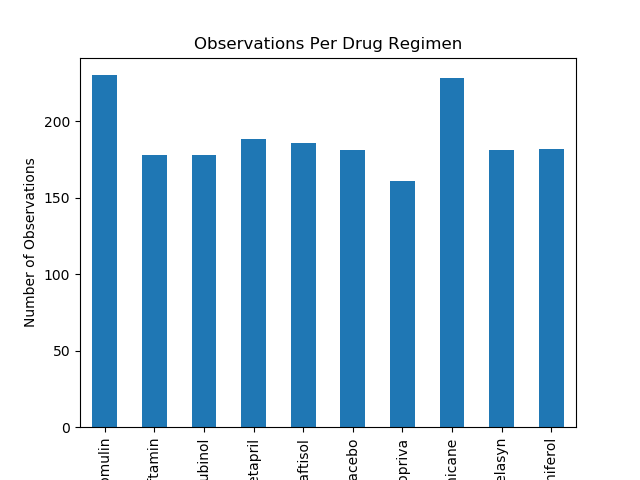

In [21]:
count_chart = count_obs.plot(kind='bar', title = "Observations Per Drug Regimen", rot = 90)
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Observations")
plt.show()

### Matplotlib's PyPlot

In [22]:
drugs = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", 
        "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"]

In [23]:
x_axis = np.arange(len(count_obs))

<IPython.core.display.Javascript object>


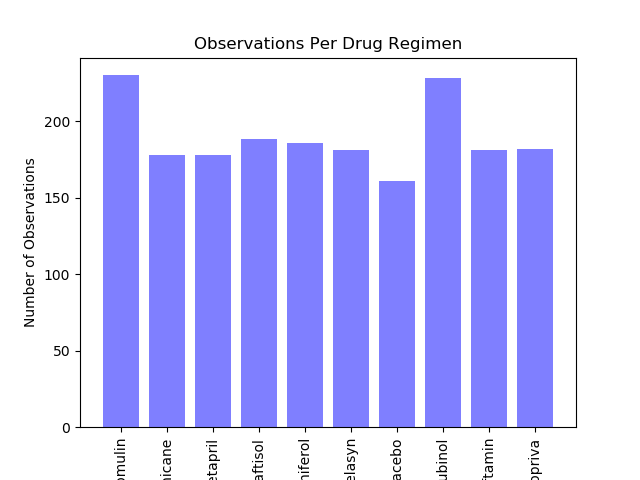

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing arguments to show(), other than passing 'block' by keyword, is deprecated 3.1, and support for it will be removed in 3.3.
  import sys


In [24]:
pyplot = plt.bar(x_axis, count_obs, color='b', alpha=0.5, align="center")
pyplot = tick_locations = [value for value in x_axis]
pyplot = plt.xticks(tick_locations, drugs, rotation="vertical")
pyplot = plt.title("Observations Per Drug Regimen")
pyplot = plt.xlabel("Drug Regimen")
pyplot = plt.ylabel("Number of Observations")
plt.show (pyplot)

## Pie Charts of Mice Gender

### Panda's DataFrame Plot

In [25]:
gender_groups = data.groupby(["Sex","Mouse ID"])
gender_groups.count().head(10)

Drug Regimen  Age_months  Weight (g)  Timepoint  \
Sex    Mouse ID                                                    
Female a203                10          10          10         10   
       a251                10          10          10         10   
       a262                10          10          10         10   
       a275                10          10          10         10   
       a366                 7           7           7          7   
       a401                10          10          10         10   
       a444                10          10          10         10   
       a457                 3           3           3          3   
       a577                 7           7           7          7   
       a644                10          10          10         10   

                 Tumor Volume (mm3)  Metastatic Sites  
Sex    Mouse ID                                        
Female a203                      10                10  
       a251                      10                10  
       a262                      10                10  
       a275                      10                10  
       a366                       7                 7  
       a401                      10                10  
       a444                      10                10  
       a457                       3                 3  
       a577                       7                 7  
       a644                      10                10

In [26]:
gender_count = data.groupby('Sex')["Mouse ID"].nunique()
gender_count

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

<IPython.core.display.Javascript object>


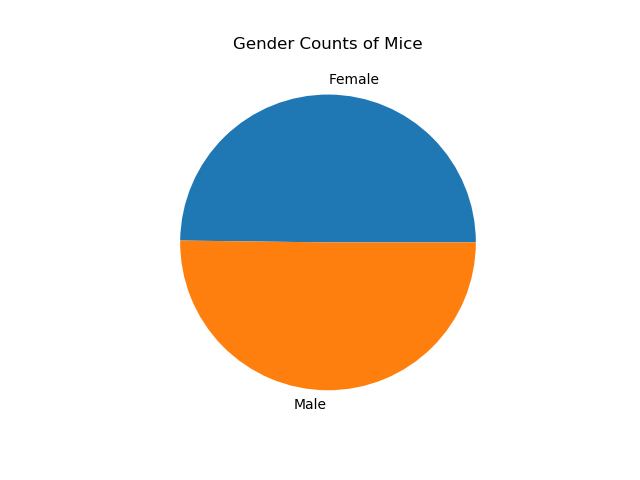

Text(0, 0.5, ' ')

In [27]:
gender_pie = gender_count.plot(kind="pie", y=gender_count, title=("Gender Counts of Mice"))
gender_pie.set_ylabel(" ")

### Matplotlib's PyPlot

In [28]:
labels = ["Female", "Male"]
sizes = [124, 125]
colors = ["blue", "orange"]

<IPython.core.display.Javascript object>


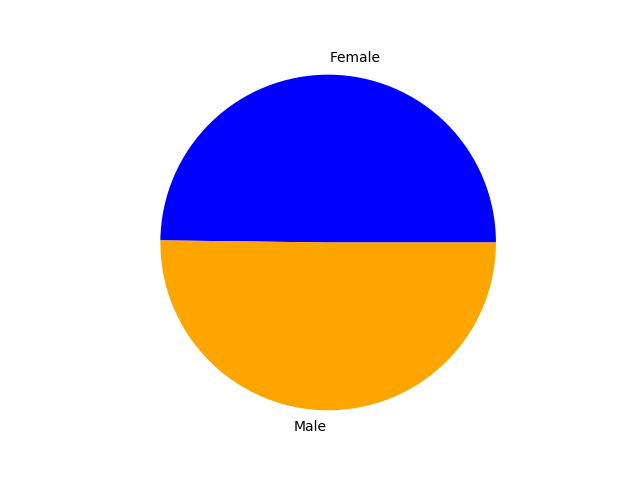

(-1.1016630746735625,
 1.1000791940320744,
 -1.1009347297692742,
 1.1017685314144794)

In [29]:
plt.pie(sizes, labels=labels, colors=colors)
plt.axis("equal")

## Final Tumor Volume- Boxplots

In [59]:
data.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [31]:
tumor_max = data.groupby(["Mouse ID"]).max()  ## gets unique mouse IDs with highest timpepoint
tumor_max = tumor_max.reset_index() # creates new dataframe with each mouse's highest timepint
tumor_df = tumor_max[["Mouse ID", "Timepoint"]].merge(data, on = ["Mouse ID", "Timepoint"], how = "left") #brings in other columns in data- like tumor vol
tumor_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [32]:
# List of final tumor volumes for each promising drugs
cap_max = tumor_df.loc[tumor_df["Drug Regimen"] == "Capomulin",:]["Tumor Volume (mm3)"]
ram_max = tumor_df.loc[tumor_df["Drug Regimen"] == "Ramicane",:]["Tumor Volume (mm3)"]
inf_max = tumor_df.loc[tumor_df["Drug Regimen"] == "Infubinol",:]["Tumor Volume (mm3)"]
cef_max = tumor_df.loc[tumor_df["Drug Regimen"] == "Ceftamin",:]["Tumor Volume (mm3)"]

In [45]:
# Capomulin
cap_quartiles = cap_max.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
print(f"The lower quartile of Capomulin is: {cap_lowerq}")
print(f"The upper quartile of Capomulin is: {cap_upperq}")
print(f"The interquartile range of Capomulin is: {cap_iqr}")
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [46]:
# Ramicane
ram_quartiles = ram_max.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
print(f"The lower quartile of Ramicane is: {ram_lowerq}")
print(f"The upper quartile of Ramicane is: {ram_upperq}")
print(f"The interquartile range of Ramicane is: {ram_iqr}")
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [47]:
# Infubinol
inf_quartiles = inf_max.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
print(f"The lower quartile of Infubinol is: {inf_lowerq}")
print(f"The upper quartile of Infubinol is: {inf_upperq}")
print(f"The interquartile range of Infubinol is: {inf_iqr}")
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [48]:
# Ceftamin
cef_quartiles = cef_max.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
print(f"The lower quartile of Ceftamin is: {cef_lowerq}")
print(f"The upper quartile of Ceftamin is: {cef_upperq}")
print(f"The interquartile range of Ceftamin is: {cef_iqr}")
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Values below {cef_lower_bound} could be outliers.")
print(f"Values above {cef_upper_bound} could be outliers.")

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


<IPython.core.display.Javascript object>


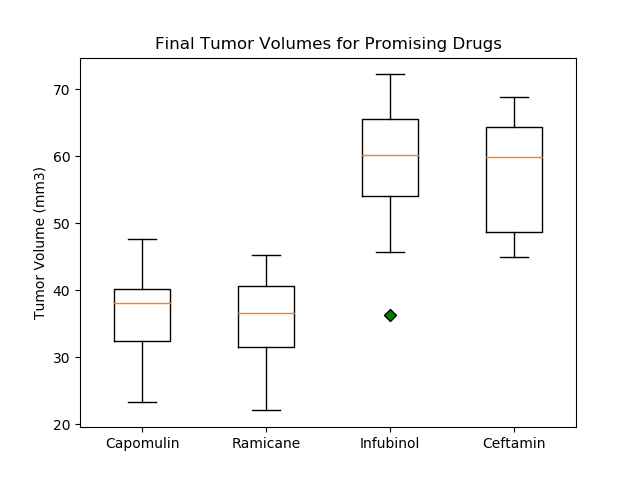

<function matplotlib.pyplot.show(*args, **kw)>

In [60]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes for Promising Drugs')
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax1.boxplot([cap_max, ram_max, inf_max, cef_max], flierprops=green_diamond)
plt.show

## Line Plot- Time vs Tumor Volume

In [58]:
data.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [65]:
mouse_s185 = data.loc[data["Mouse ID"] == "s185",:]
mouse_s185

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [66]:
timepoint = mouse_s185["Timepoint"]

In [68]:
tumor = mouse_s185["Tumor Volume (mm3)"]

<IPython.core.display.Javascript object>


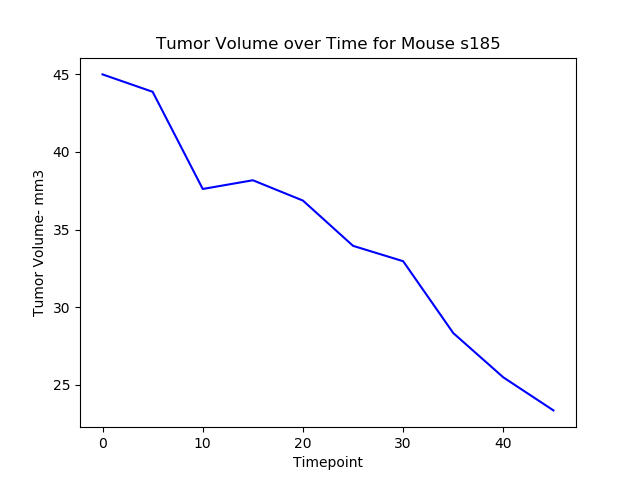

Text(0.5, 1.0, 'Tumor Volume over Time for Mouse s185')

In [75]:
Mouse_tum, = plt.plot(timepoint, tumor, color="blue")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume- mm3')
plt.title("Tumor Volume over Time for Mouse s185")

## Scatter plot of mouse weight versus average tumor volume for Capomulin

In [76]:
data.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [78]:
cap_df = data.loc[data["Drug Regimen"] == "Capomulin",:]
cap_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


<IPython.core.display.Javascript object>


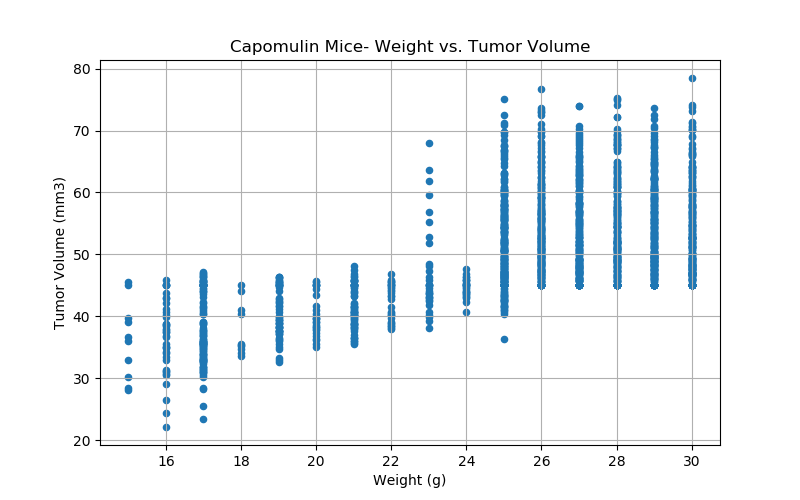

In [84]:
cap_chart = data.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,5),
              title="Capomulin Mice- Weight vs. Tumor Volume")
cap_chart

## Correlation

In [94]:
import scipy.stats as st
from scipy.stats import linregress

In [95]:
data["Weight (g)"].dtype

dtype('int64')

In [96]:
weight = cap_df.iloc[:,5]
tumor_size = cap_df.iloc[:,7]
correlation = st.pearsonr(weight,tumor_size)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.58


In [120]:
x_values = cap_df["Weight (g)"]
y_values = cap_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = 0.96x + 21.49'

<IPython.core.display.Javascript object>


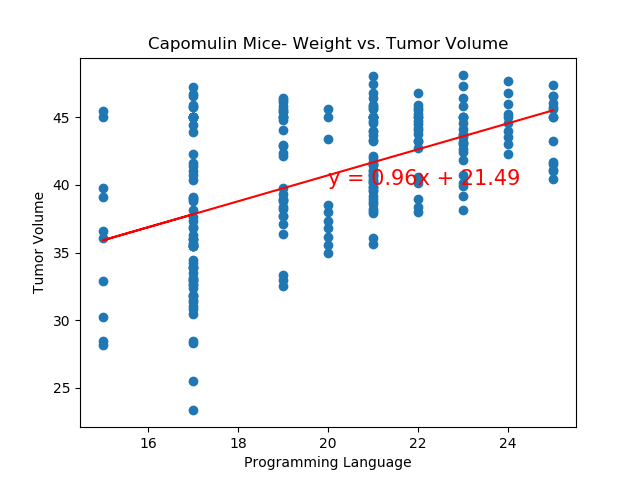

Text(0.5, 0, 'Programming Language')

In [121]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Weight of Mouse')
plt.ylabel('Tumor Volume')
plt.title("Capomulin Mice- Weight vs. Tumor Volume")
plt.xlabel("Programming Language")

## Observations

In [ ]:
#1. Compared to Infutbiol abnd Caftamin, Ramicane and Capomulin seem to shrink tumor size more intensely. 
#2. Smaller and medium mice seem to experience a less drastic change in their tumor volume, whereas 
    #larger mice experience a larger range of the beginning and end tumor sizes.
#3. For mouse s185, the drug Capomulin seemed to plateau in effectivess toward the beginning of the regimen, but eventually drastically reduced tumor size.